In [14]:
import torch

In [20]:


class LinearRegression(torch.nn.Module):
    """线性回归"""
    def __init__(self):
        super().__init__()
        self.fc = torch.nn.Linear(1, 1)

    def forward(self, x):
        """前向传播"""
        return self.fc(x)

In [22]:
#获取数据和标签
x = torch.Tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.Tensor([[1], [4], [9], [16]])

In [27]:
#实例化
model = LinearRegression()
#找一个损失函数loss function
loss_function = torch.nn.MSELoss() #均方误差损失函数 
#找一个优化器optimizer, 通过调整模型参数（如权重和偏置）来最小化损失函数
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)

In [30]:
total_loss = []
for i in range(5000):
    #前向传播
    y_pre = model(x)
    loss = loss_function(y_pre, y) #损失函数的用法

    #后向传播
    optimizer.zero_grad() #清零梯度，因为pytorch的梯度默认是累加的，需要手动清空
    loss.backward() #从损失值loss计算全部组参数的梯度，用于optimizer更新、调整参数

    #更新、调整参数
    optimizer.step()
    total_loss.append(loss.item()) #.item()将额外信息剥离，只保留数值，这样可以与python的原生类型一起玩

In [ ]:
total_loss

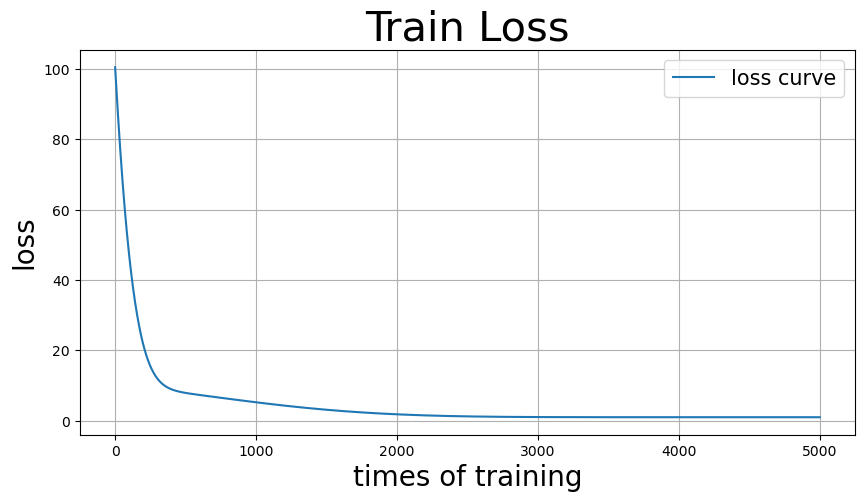

In [39]:
#画图啦
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.plot(total_loss, label="loss curve")
plt.xlabel("times of training", fontsize=20)
plt.ylabel("loss", fontsize=20)
plt.title("Train Loss", fontsize=30)
plt.legend(fontsize = 15)
plt.grid()
plt.show()